### __Simple Linear Regression__

Correlation is one way to describe the association between two variables. While correlation measures the strength of the relation, regression quantifies the nature of the relationship.

__*Response*__ <br>
The variable we are trying to predict. *Synonym:* dependent variable, Y variable.

__*Independent variable*__ <br>
The variable used to predict the response. *Synonym:* X variable, feature, predictor.

__*Record*__ <br>
The vector of predictor and outcome values for a specific individual or case.

__*Intercept*__ <br>
The intercept of the regresion line; the predicted value when X = 0. *Synonym:* $\beta_0$.

__*Regression coefficient*__ <br>
The slope of the regression line. *Synonym:* weights, $\beta_1$

__*Fitted values*__ <br>
The estimates $\hat{Y}_i$ obtained from the regression line. *Synonym:* predicted values.

__*Residuals*__ <br>
The difference between the observed values and the fitted values. *Synonym:* errors.

__*Least squares*__ <br>
The method of fitting a regression by minimizing the sum of squared residuals. *Synonym:* ordinary least squares, OLS.

Simple linear regression estimates how much $Y$ will change when $X$ changes by a certain amount. The linear relation ship is described as:

$Y= b_0 +b_1 X$

In general, the data doesn't fall exactly on a line, so the regression equation should include an explicit error term:

$Y_i= b_0 + b_1 X_i + e_i$

the $\hat{}$ notation indicates that a value is estimated.
We can calculate the residuals $\hat{e_i}$ with:

$\hat{e_i}=Y_i + \hat{Y_i}$

<p align=center>
<img src="Linear regression residuals.jpg" alt="Linear Regression Residuals" width=300></p>

The regression line is, essentially, the estimate that minimizes the sum of quared residual values (*Residual sum of squares, RSS*)

$RSS = \sum\limits^n_{i=1}(Y_i - \hat{Y}_i)^2$ <br>
$RSS = \sum\limits^n_{i=1}(Y_i - \hat{b}_0 - \hat{b}_1X_i)^2$

The $\hat{b}_0 - \hat{b}_1$ estimates are the values that minimize RSS.

Least squares are sensitive to outliers, especially in small data sets.
The regression equation does not prove the direction of causation. Conclusions about causation must come from a broader understanding about the relationship.


### __Multiple Linear Regression__

When there are multiple predictors, the quation is extended to accomodate them:

$Y_i= b_0 + b_1 X_1 + b_2 X_2 + ... + b_p X_p + e$

Instead of a line, we now have a linear model; the relationship between each coefficient and its variable (feature) is linear.

__*Root mean squared error*__ <br>
The square root of the average squared error of the regression (this is the most widely used metric to compare regression models). *Synonym:* RMSE

__*Residual standard error*__ <br>
The same as the root mean squared error, but adjusted for degrees of freedom. *Synonym:* RSE

__*R-squared*__ <br>
The proportion of variance explained by the model, from 0 to 1. *Synonym:* coefficient of determination.

__*t-statistic*__ <br>
The coefficient for a predictor, divided by the standard error of the coefficient, giving a metric to compare the importance of variables in the model. 

__*Weighted regression*__ <br>
Regression with the records having different weights.

Classic statistical regression metrics are all "in-sample" metrics; they are applied to the same data that was used to fit the model. It would make sense then to set aside some of the original data, not use it to fit the model, but then apply the model to the set-aside data (holdout) to see how well the model does.

cross-validation extends the ida of a holdout sample to multiple sequential holdout samples. The algorith for basic *k-fold cross-validation*:

<ol>
<li>Set aside 1/k of the data as aholdout sample.</li>
<li>Train the model on the remaining data.</li>
<li>Apply (score) the model to the 1/k holdout, and record neededmodel assessment metrics.</li>
<li>Restore the first 1/k of the data, and set aside the next 1/k (excluding any records that got picked the first time.)</li>
<li>Repeat steps 2 and 3.</li>
<li>Repeat until each record has been used in the holdout portion.</li>
<li>Average or otherwise combine the model assessment metrics.</li>
</ol>

The division of the data into the training sample and the houldout sample is called *fold*.

In some problems, many variables may be used as predictors in a regression. however, adding more variables does not necessarily mean we havea better model. Generally, with all things being equal, a simpler model should be used in preference to a more complicated model.

Including additional variables always reduces RMSE and increases $R^2$ for the training data. Not appropriate to help guide the model choice. One approach to including model complexity is to use the adjusted $R^2$:

$R^2_{adj} = 1 - (1 - R^2)\frac{n-1}{n-P-1}$

$n$ - the number of records <br>
$P$ - the number of variables in the model.

A metric that penalizes adding terms to a model is Akaike's Information Criteria (AIC). In case of regression:

$AIC = 2P + nlog(RSS/n)$

$P$ - the number of variables <br>
$n$ - the number of records

Hence, the goal is to find the model with lowest AIC. 

### __Prediction Using Regression__

The primary purpose of regression in data science is prediction. 

__*Prediction interval*__ <br>
An uncertainty interval around an individual predicted value.

__*Extrapolation*__ <br>
Extension of a model beyond the range of the data used to fit it.

Regression models should not be used to extrapolate beyond the range of the data (except for time series forecasting). 

Useful metric in regression are the confidence intervals, the uncertainty intervals placed around regression coefficients and predictions. Confidence intervals for coefficients can be found using bootstrap:

<ol>
<li>Consider each row (including outcome variable) as a single “ticket” and place all
the $n$ tickets in a box.</li>
<li>Draw a ticket at random, record the values, and replace it in the box.</li>
<li>Repeat step 2 n times; you now have one bootstrap resample.</li>
<li>Fit a regression to the bootstrap sample, and record the estimated coefficients.</li>
<li>Repeat steps 2 through 4, say, 1,000 times.</li>
<li>You now have 1,000 bootstrap values for each coefficient; find the appropriate
percentiles for each one (e.g., 5th and 95th for a 90% confidence interval).</li>
</ol>

$n$ - the number of records (rows)

Data scientists are usually more concerned with the intervals aroundthe predicted values, $\hat{Y}_i$ . The uncertainty around $\hat{Y}_i$ comes from two sources:

* Uncertainty about what the relevant predictor variables and their coefficients are.
* Additional error inherent in individual data points.

The individual data point error comes from the fact that the *actual* outcome values for a given predictor values will vary. We can model individual error with the residuals from the fitted values. The bootstrap algorithm for modeling both the regression model error and the individual data point error:

<ol>
<li>Take a bootstrap sample from the data.</li>
<li>Fit the regression, and predict the new value.</li>
<li>Take a single residual at random from the original regression fit, add it to the predicted value, and record the result.</li>
<li>Repeat steps 1 to 3 many times, e.g. 1,000 times.</li>
<li>Find the 2.5th and the 97.5th percentiles of the results.</li>
</ol>

### __Factor Variables in Regression__

*Factor* variables oro *categorical* variables are the limited number of  discrete values. The binary (yes / no) variable, also called *indicator* variable, is a special case of a factor variable. Since regression need numerical inputs, factor variables need to be recoded to use in the model. The most common approach is to convert a variable into a set of binary *dummy* variables.

__*Dummy variables*__ <br>
Binary variables derived by recoding factor data for use in regression and other models.

__*Reference coding*__ <br>
The most common type of coding used by statisticians, in which one level of a factor is used as a reference and other factors are compared to that level. *Synonym:* treatment coding

__*One hot encoder*__ <br>
A common type of coding used in the machine learning community in which all factor levels are retained. While useful for certain machine learning algorithms, this approach is not appropriate for multiple linear regression.

__*Deviation coding*__ <br>
A type of coding that compares each level against the overall mean as opposed to the reference level. *Synonym:* sum contrasts

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [65]:
# We are to make a predictioin on the target variable, price
car_prices = pd.read_csv("CarPrice.csv")
car_prices.shape # dimension of the data
car_prices.info() # no missing value, NaN, Null
car_prices.duplicated().sum() # No duplicated row(s)
car_prices.nunique() # CarID is repetition of the index, can be dropped
car_prices["CarName"].unique() # A look at the brand names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [66]:
car_prices["model"] = [name.split(" ")[0] for name in car_prices["CarName"]]
car_prices["model"].unique() # Some typos, and abbreviations

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [67]:
# correct spellings, drop the Car_ID and CarName collumns
car_prices["model"] = car_prices["model"].replace({
    "maxda": "mazda",
    "Nissan": "nissan",
    "porcshce": "porsche",
    "toyouta": "toyota",
    "vokswagen": "volkswagen",
    "vw": "volkswagen"
})

car_prices.drop(["car_ID", "CarName"], axis=1, inplace=True)

# Therefore
print(f"We have {car_prices.shape[0]} records, {car_prices.shape[1]-1} predictors, and 1 output variable")

We have 205 records, 24 predictors, and 1 output variable


In [68]:
categorical = car_prices.select_dtypes(include="object").columns # Categorical columns that will need to be decoded in to dummies
categorical

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'model'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

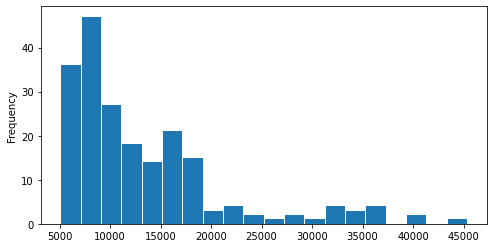

In [69]:
# A little data exploring
car_prices["price"].plot(kind="hist", bins=20, figsize= (8,4), xlabel="Price", rwidth=.95) # The car prices are skewed to the right, which makes sense

In [70]:
car_prices.drop("price", axis=1).describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751
std,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886
min,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000
25%,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000
50%,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000
75%,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000
max,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000


In [71]:
car_prices.groupby("doornumber")["price"].mean() # On average, cars with four doors are more expensive

doornumber
four   13501.152
two    12989.924
Name: price, dtype: float64

<AxesSubplot:>

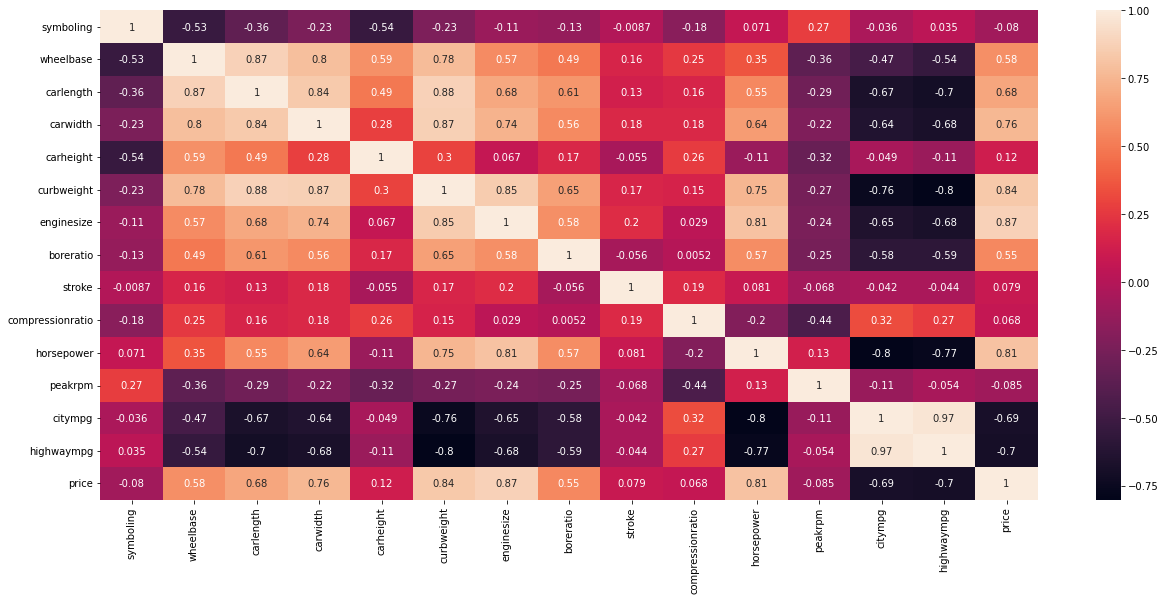

In [72]:

plt.figure(figsize=(21,9))
sns.heatmap(data=car_prices.corr(), annot=True) # Correlation heatmap between the variables. citympg and highwaympg are very closely correlated. Should drop one of them later to avoid collinearity

In [73]:
car_prices.groupby("carbody")["price"].mean()

carbody
convertible   21890.500
hardtop       22208.500
hatchback     10376.652
sedan         14344.271
wagon         12371.960
Name: price, dtype: float64

In [74]:
car_prices.groupby("enginetype")["price"].mean().sort_values()

enginetype
ohc     11574.048
rotor   13020.000
ohcf    13738.600
l       14627.583
dohc    18116.417
ohcv    25098.385
dohcv   31400.500
Name: price, dtype: float64

In [75]:
car_prices = pd.get_dummies(car_prices, columns=categorical, drop_first=True) # The categorical columns are converted into binary variables
car_prices.shape

(205, 65)

In [76]:
car_prices.columns 

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'model_audi', 'model_bmw',
       'model_buick', 'model_chevrolet', 'model_dodge', 'model_honda',
       'model_isuzu', 'model_jaguar', 'model_mazda', 'm

In [77]:
# Predictors and the response
X = car_prices.drop(columns=["citympg", "price"])
y = car_prices["price"]

In [78]:
# Split train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f"Shape of the training predictor set: {X_train.shape}")
print(f"Shape of the training target set: {y_train.shape}")
print(f"Shape of the testing predictor set: {X_test.shape}")
print(f"Shape of the testing target set: {y_test.shape}")

Shape of the training predictor set: (137, 63)
Shape of the training target set: (137,)
Shape of the testing predictor set: (68, 63)
Shape of the testing target set: (68,)


In [79]:
# Sklearn preprocessing to standardize the dataset
# Since there are dummy variables MinMaxScaler is good for scaling the features
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# Fitting a linear model
ln_model = LinearRegression()
ln_model.fit(X_train_scaled, y_train)

LinearRegression()

In [81]:
y_pred = ln_model.predict(X_test_scaled) # predictions of prices based on test feature set
y_train_pred = ln_model.predict(X_train_scaled)

In [82]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

pd.options.display.float_format = "{:.3f}".format
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.978,0.891
mae,913.650,1816.311
mse,1359602.563,7153488.167
rmse,1166.020,2674.601


<AxesSubplot:ylabel='Frequency'>

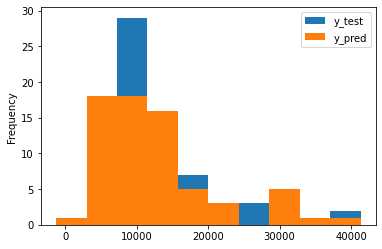

In [83]:
pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred
}).plot(kind="hist")

### __Interpreting the Regression Equation__

While the most important use of regression to a data scientist is to predict some dependent variable. It may be of great value if you can gain insight from the nature of the relationship between the predictors and the outcome.

__*Correlated variables*__ <br>
When the predictor variables are highly correlated, it is difficult to interpret the individual coefficients.

__*Multicollinearity*__ <br>
When the predictor variables have perfect, or near-perfect, correlation, the regression can be unstable or impossible to compute. *Synonym:* collinearity

__*Confounding variables*__ <br>
An important predictor that, when omitted, leads to spurious relationships in a regression equation.

__*Main effects*__ <br>
The relationship between a predictor and the outcome variable, independent of other variables.

__*Interactions*__ <br>
An interdependent relationship between two or more predictors and the response.

An extreme case of correlated variables produces multicollinearity: There is reduncdance among the predictor variables. Multiicollinearity occurs when:

* A variable is included multiple times by error.
* *P* dummies, instead of *P - 1* dummies, are created from a factor variable.
* Two variables are nearly perfectly correlated with one another.

Multicollinearity in regression must be addressed; variables must be removed until the multicollinearity is gone. 

> Multicollinearity is not such a problem for non-linear regression methods like trees, clustering, and nearest-neighboouts. In such methods it may be okay to keep P dummies, instead of P - 1. That said, even with those methods, non-redundancy in predictor variables is still a virtue.

### __Regression Diagnostics__

Steps are taken to assess how well the model fits the data; normally based on the analysis of the residuals (minimizing them). These steps do not directly address predictive accuracy, but they can provide usefull insight in a predictive setting.

__*Standardized residuals*__ <br>
Residuals divided by the standard error of the residuals.

__*Outliers*__ <br>
Records, or outcome values, that are distant from the rest of the data (or the predicted outcome).

__*Leberage*__ <br>
The degree of influence that a single record has on a regression equation.

__*Non-normal residuals*__ <br>
Non-normally distributed residuals can invalidate some technical requirements of regression but are usually not a concern in data science.

__*Heteroskedasticity*__ <br>
When some ranges of the outcome experience residuals with higher variance (may indicate a predictor missing from the equation).

__*Partial residual plots*__ <br>
A diagnostic plot to illuminate the relationship between the outcome variable and a single predictor. *Synonym:* added variables plot

Just how outliers need to be handled for estimates of location and variability, outliers can cause problems with regression models. In regression, an outlier is a record whose actual $y$ value is distant from the predicted value. You can detect outliers by looking into the *standardized residual*.

For most problems, data scientists do not need to be too concerned with the distribution of the residuals. The distribution of residuals is relevant mainly for the validity of formal statistical inference (hypothesis tests, p-values), which is minimal importance to data scientists concerned wtih predictive accuracy. One area where this may be of concern to data scientists is the standard calculation of confidence intervals for predicted values, which are based on the assumptions about the residuals. 

The data has heteroskedastic errors when the variance of the residuals is not constant. Example:
<p align=center>
<img src="heteroskedasticity.jpg" alt="Heteroskedastiity" width=300>
</p>

The partial residual plot can be used to qualitatively assess the fit for each regression term, possibly leading to alternative model specification.

### __Polynomial and Spline Regression__

The relationship between the response and the predictor isn't necessarily linear (demand / sales of a product is not a linear response to the marketing dolars spent.)

__*Polynomial regression*__ <br>
Adds polynomial terms (squares, cubes, etc) to a regression.

__*Spline regression*__ <br>
Fitting a smooth curve with a series of polynomial segments.

__*Knots*__ <br>
Values that separate spline segments.

__*Generalized additive models*__ <br>
Spline models with automated selection of knots. *Synonym:* GAM

Polynomial regression involves including polynomial terms in the equation